Importando bibliotecas

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.api as sms
from scipy.stats import boxcox

Importando o data set

In [9]:
cerveja = pd.read_csv('Consumo_cerveja_1 (1).csv')

Análise exploratória dos dados

Primeiras observações da base de dados.

In [10]:
cerveja.head()

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29.799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28.900


Últimas Observações

In [11]:
cerveja.tail()

,Data,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
360,27/12/2015,24.00,21.1,28.2,13.6,1,32.307
361,28/12/2015,22.64,21.1,26.7,0.0,0,26.095
362,29/12/2015,21.68,20.3,24.1,10.3,0,22.309
363,30/12/2015,21.38,19.3,22.4,6.3,0,20.467
364,31/12/2015,24.76,20.2,29.0,0.0,0,22.446


Dimensão da base de dados: são 365 observações e 7 variáveis.

In [12]:
cerveja.shape

(365, 7)

Validação de observações nulas (NULL)


In [13]:
cerveja.isna().sum()

Data                  0
Temperatura_Media     0
Temperatura_Minima    0
Temperatura_Maxima    0
Precipitacao          0
Final_de_Semana       0
Consumo               0
dtype: int64

Tipo das variáveis.

In [14]:
cerveja.dtypes

Data                   object
Temperatura_Media     float64
Temperatura_Minima    float64
Temperatura_Maxima    float64
Precipitacao          float64
Final_de_Semana         int64
Consumo               float64
dtype: object

Tabela descritiva das variáveis

In [15]:
cerveja.describe()

,Temperatura_Media,Temperatura_Minima,Temperatura_Maxima,Precipitacao,Final_de_Semana,Consumo
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,21.226356,17.461370,26.611507,5.196712,0.284932,25.401367
std,3.180108,2.826185,4.317366,12.417844,0.452001,4.399143
min,12.900000,10.600000,14.500000,0.000000,0.000000,14.343000
25%,19.020000,15.300000,23.800000,0.000000,0.000000,22.008000
50%,21.380000,17.900000,26.900000,0.000000,0.000000,24.867000
75%,23.280000,19.600000,29.400000,3.200000,1.000000,28.631000
max,28.860000,24.500000,36.500000,94.800000,1.000000,37.937000


In [16]:
cerveja_numeric = cerveja.select_dtypes(include=['float64', 'int64'])

Gráfico correlograma

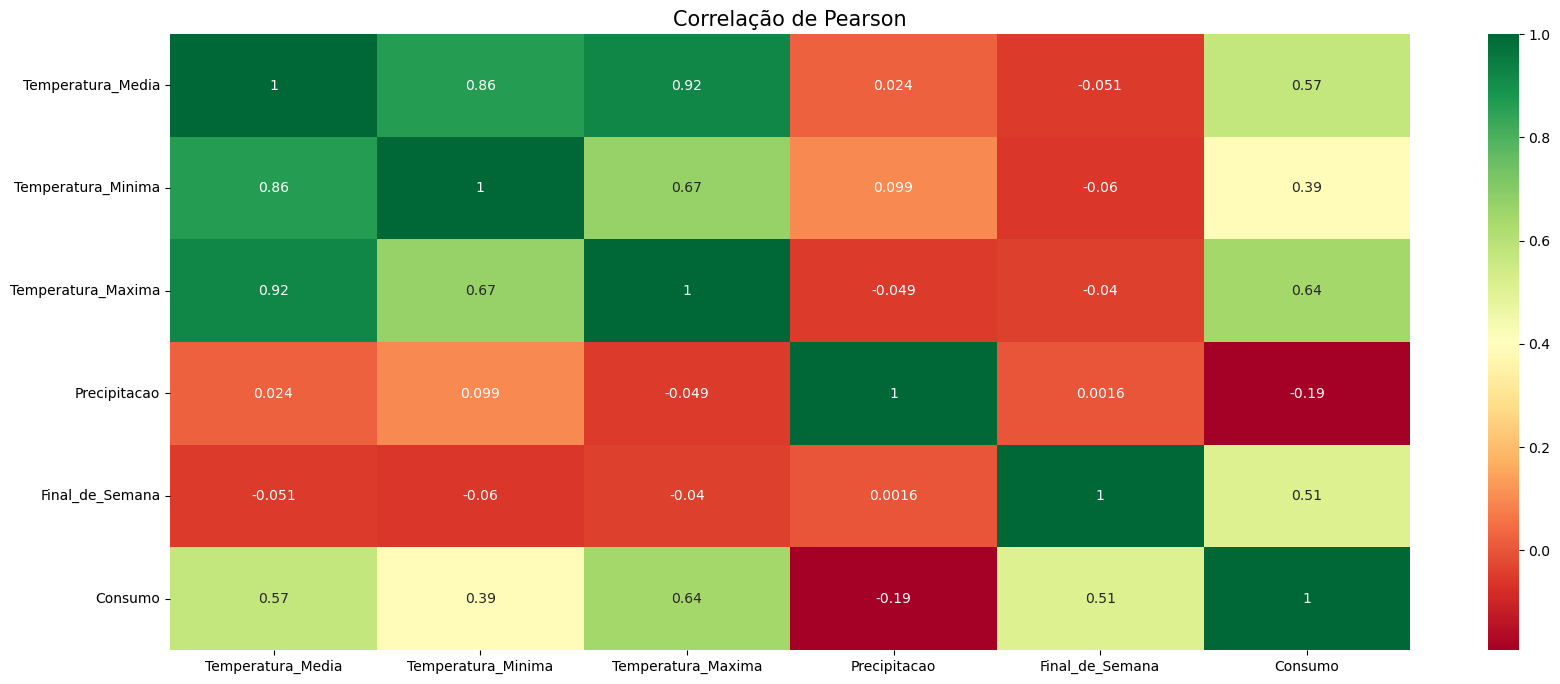

In [17]:
plt.figure(figsize=(20,8))
sns.heatmap(cerveja_numeric.corr(), annot = True, cmap= "RdYlGn");
plt.title('Correlação de Pearson',size=15);

As maiores correlação são temperatura máxima , temperatura média e final de semana

In [18]:
#Variáveis independentes
X = cerveja.drop(['Consumo','Data'],axis=1)
#Variável dependentes
y = cerveja['Consumo']

In [19]:
m1 = sm.OLS.from_formula("Consumo ~  Temperatura_Maxima + Final_de_Semana", data=cerveja)
modelo = m1.fit()
print("Análise do Modelo:")
print(modelo.summary())

Análise do Modelo:
                            OLS Regression Results                            
Dep. Variable:                Consumo   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     415.1
Date:                Sat, 03 May 2025   Prob (F-statistic):           2.03e-94
Time:                        21:10:24   Log-Likelihood:                -840.61
No. Observations:                 365   AIC:                             1687.
Df Residuals:                     362   BIC:                             1699.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept        

In [20]:
residuos = modelo.resid
residuos

0     -2.447811
1      0.386491
2     -0.520109
3     -0.655401
4      3.833321
         ...   
360    2.123278
361    2.111038
362    0.084453
363   -0.607160
364   -3.094368
Length: 365, dtype: float64

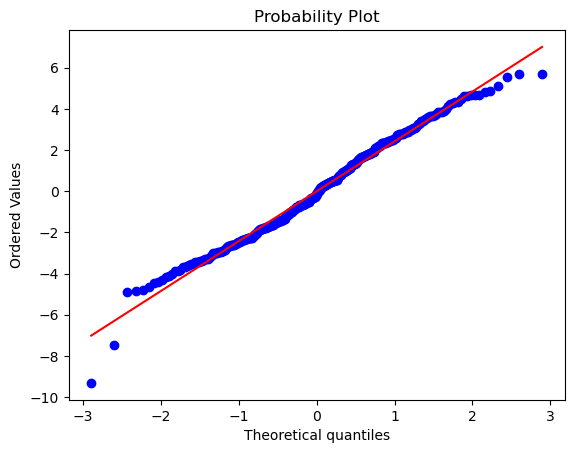

In [21]:
stats.probplot(residuos, dist='norm', plot=plt)
plt.show()

In [22]:
estatistica, p = stats.shapiro(residuos)

In [23]:
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9883790546593744
p-valor: 0.005213638994497414


In [24]:
transformed_data, lambda_value = boxcox(y)

In [25]:
# Exibindo o lambda estimado
print(f"Valor de lambda estimado: {lambda_value:.4f}")

Valor de lambda estimado: 0.3205


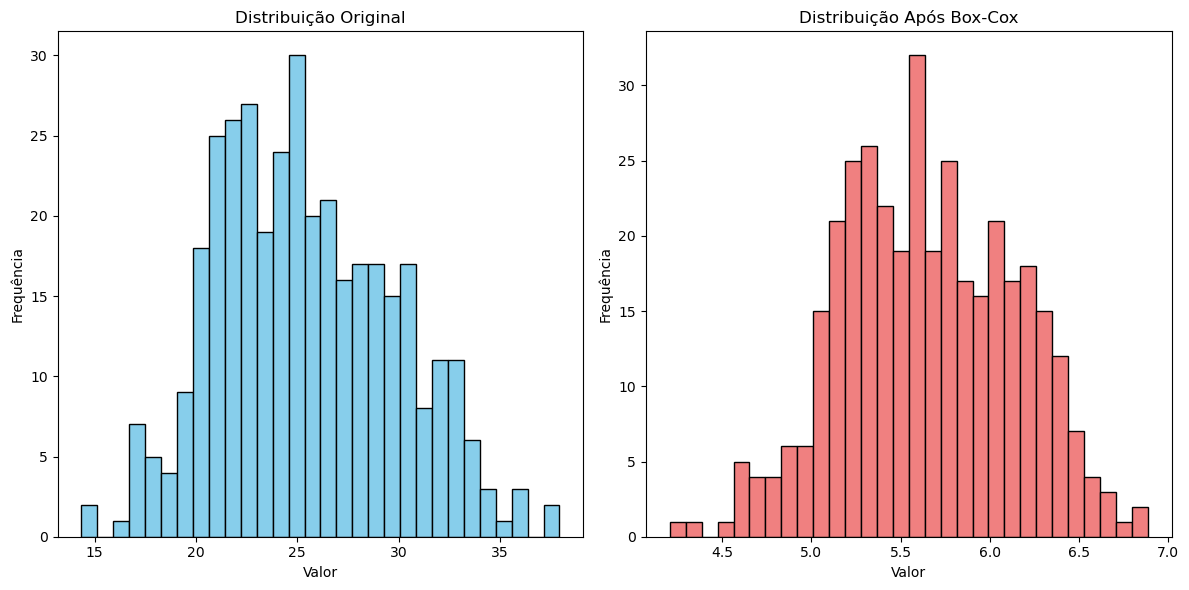

In [26]:
# Plotando antes e depois da transformação
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(y, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição Original')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.subplot(1, 2, 2)
plt.hist(transformed_data, bins=30, color='lightcoral', edgecolor='black')
plt.title('Distribuição Após Box-Cox')
plt.xlabel('Valor')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [27]:
#cerveja['transformed_data'] = transformed_data
m2 = sm.OLS.from_formula("transformed_data ~  Temperatura_Maxima + Final_de_Semana", data=cerveja)
modelo2 = m2.fit()
print("Análise do Modelo:")
print(modelo2.summary())

Análise do Modelo:
                            OLS Regression Results                            
Dep. Variable:       transformed_data   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     418.5
Date:                Sat, 03 May 2025   Prob (F-statistic):           7.30e-95
Time:                        21:10:28   Log-Likelihood:                -37.746
No. Observations:                 365   AIC:                             81.49
Df Residuals:                     362   BIC:                             93.19
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept        

In [28]:
residuos2 = modelo2.resid
residuos2

0     -0.251164
1      0.044896
2     -0.065335
3     -0.066332
4      0.433330
         ...   
360    0.207054
361    0.259926
362    0.022998
363   -0.077516
364   -0.333345
Length: 365, dtype: float64

In [29]:
estatistica, p = stats.shapiro(residuos2)

In [30]:
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))

Estatística de teste: 0.9862257223432489
p-valor: 0.0015178592838306013


### Análise da Homocedasticidade dos resíduos
(resíduos com variação constante)

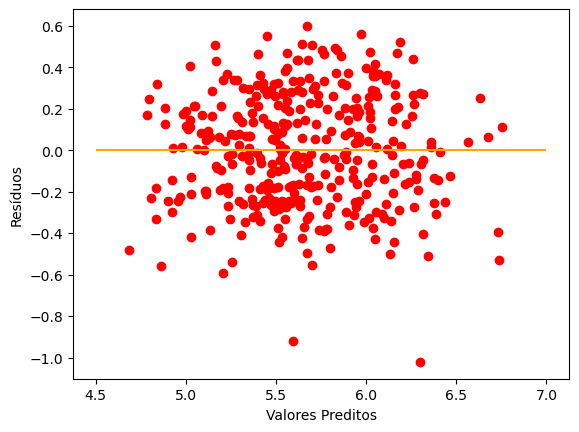

In [32]:
plt.scatter(y=residuos2, x=modelo2.predict(), color='red')
plt.hlines(y=0, xmin= 4.5, xmax=7, color='orange')
plt.ylabel('Resíduos')
plt.xlabel('Valores Preditos')
plt.show()

**Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)**

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05

In [33]:
from statsmodels.compat import lzip

In [34]:
estatistica, p, f, fp = sms.het_breuschpagan (modelo2.resid, modelo2.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 6.632609367827264
p-valor: 0.03628667503911057
f-valor: 3.349920575806307
f_p-valor: 0.03617822259041751


In [35]:
**Outiliers nos resíduos**

(Entre -3 e 3)

SyntaxError: invalid syntax (652958551.py, line 1)

In [36]:
outliers = modelo2.outlier_test()

In [37]:
outliers.max()

student_resid    2.240501
unadj_p          0.999718
bonf(p)          1.000000
dtype: float64

In [38]:
outliers.min()

student_resid   -3.885508
unadj_p          0.000121
bonf(p)          0.044339
dtype: float64

In [39]:
### **Ausência de Multicolinearidade**

In [40]:
Somente entre as variáveis **independentes**.
Atenção a valores com r > 0,7
Considerada multicolinearidade quando r > 0.9.

SyntaxError: invalid syntax (3589632239.py, line 1)

In [41]:
variaveis = cerveja[['Temperatura_Maxima', 'Final_de_Semana']]

In [42]:
correlacoes = variaveis.corr()

In [43]:
correlacoes

,Temperatura_Maxima,Final_de_Semana
Temperatura_Maxima,1.000000,-0.040258
Final_de_Semana,-0.040258,1.000000
